# Working with online data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import matplotlib.patches as mpatches

In [2]:
import requests
import json


# Loading the data

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
df = pd.DataFrame(res['result']['records'])

In [6]:
df

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,PC,781,PEGASUS AIRLINES,2023-06-06T19:35:00,2023-06-06T19:32:00,A,SAW,ISTANBUL-SABIHA GOKCHEN,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,None,None,LANDED,נחתה
1,2,EK,932,EMIRATES,2023-06-06T19:35:00,2023-06-06T19:33:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,34-44,B,DEPARTED,המריאה
2,3,FR,839,RYANAIR,2023-06-06T18:30:00,2023-06-06T19:36:00,A,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,3,None,None,LANDED,נחתה
3,4,EJU,4658,EASYJET EUROPE AIRLINE,2023-06-06T19:00:00,2023-06-06T19:51:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,1,349-351,C,DEPARTED,המריאה
4,5,LY,5030,EL AL ISRAEL AIRLINES,2023-06-06T20:00:00,2023-06-06T19:53:00,A,CFU,CORFU,קורפו,CORFU,יוון,GREECE,3,None,None,LANDED,נחתה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,2616,A4,7023,AZIMUTH AIRLINES,2023-06-10T19:15:00,2023-06-10T19:15:00,A,AER,SOCHI,סוצ'י,SOCHI,רוסיה,RUSSIAN FEDERATION,3,None,None,NOT FINAL,לא סופי
2616,2617,EJU,4658,EASYJET EUROPE AIRLINE,2023-06-10T19:15:00,2023-06-10T19:15:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,1,None,None,ON TIME,בזמן
2617,2618,IZ,1844,ARKIA ISRAELI AIRLINES,2023-06-10T19:15:00,2023-06-10T19:15:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,None,None,NOT FINAL,לא סופי
2618,2619,W6,3689,WIZZAIR,2023-06-10T19:20:00,2023-06-10T19:20:00,A,IAS,IASI,יאסי,IASI,רומניה,ROMANIA,3,None,None,NOT FINAL,לא סופי


## display the first rows 

In [7]:
df.head(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,PC,781,PEGASUS AIRLINES,2023-06-06T19:35:00,2023-06-06T19:32:00,A,SAW,ISTANBUL-SABIHA GOKCHEN,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,None,None,LANDED,נחתה
1,2,EK,932,EMIRATES,2023-06-06T19:35:00,2023-06-06T19:33:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,34-44,B,DEPARTED,המריאה
2,3,FR,839,RYANAIR,2023-06-06T18:30:00,2023-06-06T19:36:00,A,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,3,None,None,LANDED,נחתה
3,4,EJU,4658,EASYJET EUROPE AIRLINE,2023-06-06T19:00:00,2023-06-06T19:51:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,1,349-351,C,DEPARTED,המריאה
4,5,LY,5030,EL AL ISRAEL AIRLINES,2023-06-06T20:00:00,2023-06-06T19:53:00,A,CFU,CORFU,קורפו,CORFU,יוון,GREECE,3,None,None,LANDED,נחתה
5,6,AF,963,AIR FRANCE,2023-06-06T16:30:00,2023-06-06T19:55:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,64-69,C,DEPARTED,המריאה
6,7,TO,3453,TRANSAVIA FRANCE,2023-06-06T17:00:00,2023-06-06T20:00:00,D,ORY,PARIS-ORLY,פריס,PARIS,צרפת,FRANCE,1,357-360,C,DEPARTED,המריאה
7,8,HV,5803,TRANSAVIA,2023-06-06T19:55:00,2023-06-06T20:04:00,A,AMS,AMSTERDAM,אמסטרדם,AMSTERDAM,הולנד,NETHERLANDS,3,None,None,LANDED,נחתה
8,9,UA,954,UNITED AIRLINES,2023-06-06T20:00:00,2023-06-06T20:08:00,A,SFO,SAN FRANCISCO,סן פרנסיסקו,SAN FRANCISCO,ארצות הברית,UNITED STATES,3,None,None,LANDED,נחתה
9,10,EJU,3936,EASYJET EUROPE AIRLINE,2023-06-06T19:50:00,2023-06-06T20:09:00,D,MXP,MILAN-MALPENSA,מילאנו,MILAN,איטליה,ITALY,1,349-353,C,DEPARTED,המריאה


### display the last 10 rows - What's wrong? 

In [8]:
df.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2610,2611,LH,694,LUFTHANSA,2023-06-10T19:05:00,2023-06-10T19:05:00,A,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,None,None,NOT FINAL,לא סופי
2611,2612,SN,7167,BRUSSELS AIRLINES,2023-06-10T19:05:00,2023-06-10T19:05:00,A,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,None,None,NOT FINAL,לא סופי
2612,2613,TK,836,TURKISH AIRLINES,2023-06-10T19:05:00,2023-06-10T19:05:00,A,IST,ISTANBUL,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,None,None,NOT FINAL,לא סופי
2613,2614,UA,9240,UNITED AIRLINES,2023-06-10T19:05:00,2023-06-10T19:05:00,A,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,None,None,NOT FINAL,לא סופי
2614,2615,6E,4029,INDIGO AIRLINES,2023-06-10T19:05:00,2023-06-10T19:05:00,A,IST,ISTANBUL,איסטנבול,ISTANBUL,טורקיה,TURKEY,3,None,None,NOT FINAL,לא סופי
2615,2616,A4,7023,AZIMUTH AIRLINES,2023-06-10T19:15:00,2023-06-10T19:15:00,A,AER,SOCHI,סוצ'י,SOCHI,רוסיה,RUSSIAN FEDERATION,3,None,None,NOT FINAL,לא סופי
2616,2617,EJU,4658,EASYJET EUROPE AIRLINE,2023-06-10T19:15:00,2023-06-10T19:15:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,1,None,None,ON TIME,בזמן
2617,2618,IZ,1844,ARKIA ISRAELI AIRLINES,2023-06-10T19:15:00,2023-06-10T19:15:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,None,None,NOT FINAL,לא סופי
2618,2619,W6,3689,WIZZAIR,2023-06-10T19:20:00,2023-06-10T19:20:00,A,IAS,IASI,יאסי,IASI,רומניה,ROMANIA,3,None,None,NOT FINAL,לא סופי
2619,2620,W6,8094,WIZZAIR,2023-06-10T19:30:00,2023-06-10T19:30:00,D,VNO,VILNIUS INTL,וילנה,VILNIUS,ליטא,LITHUANIA,1,None,None,ON TIME,בזמן


# clean the data

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [9]:
for c in df.columns:
    empty_count = sum(df[c] == '')
    count = len(df[c])
    perc = empty_count / count * 100
    print(f"Column '{c}' has {empty_count} empty values, which are {perc} percent of total values.")

Column '_id' has 0 empty values, which are 0.0 percent of total values.
Column 'CHOPER' has 0 empty values, which are 0.0 percent of total values.
Column 'CHFLTN' has 0 empty values, which are 0.0 percent of total values.
Column 'CHOPERD' has 0 empty values, which are 0.0 percent of total values.
Column 'CHSTOL' has 0 empty values, which are 0.0 percent of total values.
Column 'CHPTOL' has 0 empty values, which are 0.0 percent of total values.
Column 'CHAORD' has 0 empty values, which are 0.0 percent of total values.
Column 'CHLOC1' has 0 empty values, which are 0.0 percent of total values.
Column 'CHLOC1D' has 0 empty values, which are 0.0 percent of total values.
Column 'CHLOC1TH' has 0 empty values, which are 0.0 percent of total values.
Column 'CHLOC1T' has 0 empty values, which are 0.0 percent of total values.
Column 'CHLOC1CH' has 0 empty values, which are 0.0 percent of total values.
Column 'CHLOCCT' has 0 empty values, which are 0.0 percent of total values.
Column 'CHTERM' has 

drop the empty rows  

In [10]:
df = df.dropna(subset=['CHOPER', 'CHFLTN', 'CHOPERD'])

format the current date with underscore separation (%d_%m_%y)

In [11]:
currdate = datetime.date.today()
currdate = currdate.strftime('%d_%m_%y')

Drop the _id column 

In [12]:
df.drop(columns='_id' , inplace=True)

save the raw data (add the current date to the file name) 

In [13]:
df.to_csv('raw_data_' + currdate + '.csv')

select the airline code and name without duplicates (CHOPER,CHOPERD)

In [14]:
choperdf = df[['CHOPER', 'CHOPERD']].drop_duplicates()

Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [15]:
airlinesdf = pd.read_csv('airlines.csv')
airlinesdf = pd.concat([airlinesdf, choperdf]).drop_duplicates()
airlinesdf
airlinesdf.to_csv('airlines.csv', index=False)

Drop the Airline name column 

In [16]:
df.drop(columns='CHOPERD' , inplace=True)

Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [17]:
dailyairports = df[['CHLOC1', 'CHLOC1D']].drop_duplicates()
airportsdf = pd.read_csv('airports.csv')
airportsdf = pd.concat([dailyairports, airportsdf]).drop_duplicates()
airportsdf
airportsdf.to_csv('airports.csv', index=False)

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [18]:
df.drop(columns=['CHLOC1TH','CHLOC1CH','CHRMINH'] , inplace=True)

### rename the columns 

Change the PlanTime and ActualTime columns type to np.datetime64

In [19]:
df['CHPTOL'] = pd.to_datetime(df['CHPTOL'])
df['CHSTOL'] = pd.to_datetime(df['CHSTOL'])

Save the clean data to new file clean.csv

In [20]:
df.to_csv('cleandata.csv')

update the file final.csv with departed, landed and canceled flights only

In [21]:
final_list = ['LANDED','DEPARTED','CANCELED']
finaldf = df[df['CHRMINE'].isin(final_list)]
finaldf.to_csv('final.csv')

Add a new column for total delay in minutes

In [22]:
df['delay in minutes'] = (df['CHPTOL'] - df['CHSTOL']).dt.total_seconds() / 60

What is the average delay for departed flights

In [23]:
## Here I Created a new df of only departed flights for the next steps.

list = ['DEPARTED','LANDED','LANDING','FINAL']
df2 = df[df['CHRMINE'].isin(list)]
df2['Date'] = pd.to_datetime(df2["CHSTOL"]).dt.date
df2['Hour'] = pd.to_datetime(df2["CHSTOL"]).dt.hour

C:\Users\Matan\AppData\Local\Temp\ipykernel_17576\2939200311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2["CHSTOL"]).dt.date
C:\Users\Matan\AppData\Local\Temp\ipykernel_17576\2939200311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hour'] = pd.to_datetime(df2["CHSTOL"]).dt.hour


In [24]:
d = df2['delay in minutes'].mean().round(2)
print('The average delay in minutes is', d)

The average delay in minutes is 21.97


Display total delay distribution (Airlines , Terminals, Date)

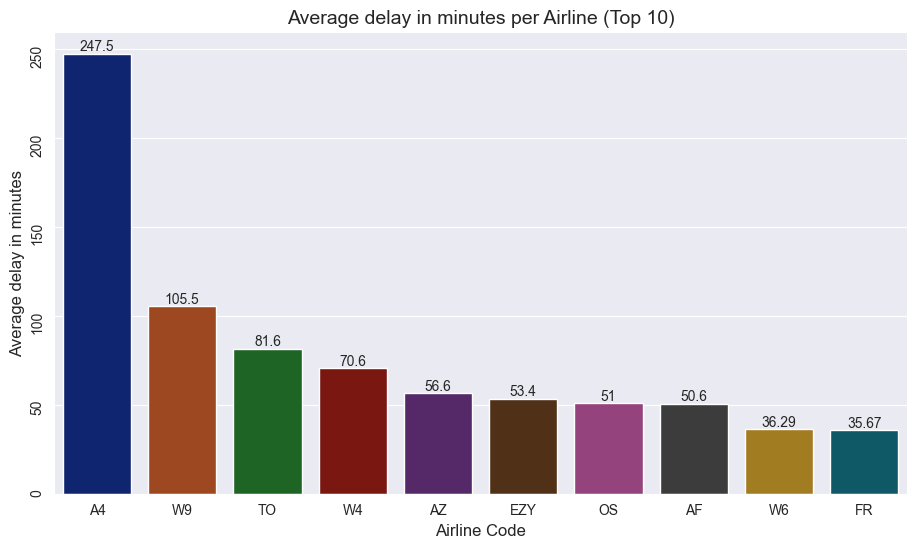

In [25]:
choper_delay = df2.groupby('CHOPER')['delay in minutes'].mean().reset_index().sort_values(by='delay in minutes', ascending=False).round(2).head(10)
plt.figure(figsize=(11,6))
sb.set_style('darkgrid')
pcolor = sb.color_palette("dark", 10)
ax = sb.barplot(data=choper_delay, x='CHOPER', y='delay in minutes', palette=pcolor)
ax.bar_label(ax.containers[0])
plt.title('Average delay in minutes per Airline (Top 10)', fontdict={'fontsize':14})
plt.xlabel('Airline Code', fontdict={'fontsize':12})
plt.ylabel('Average delay in minutes', fontdict={'fontsize':12})
plt.yticks(rotation=90)
plt.show()

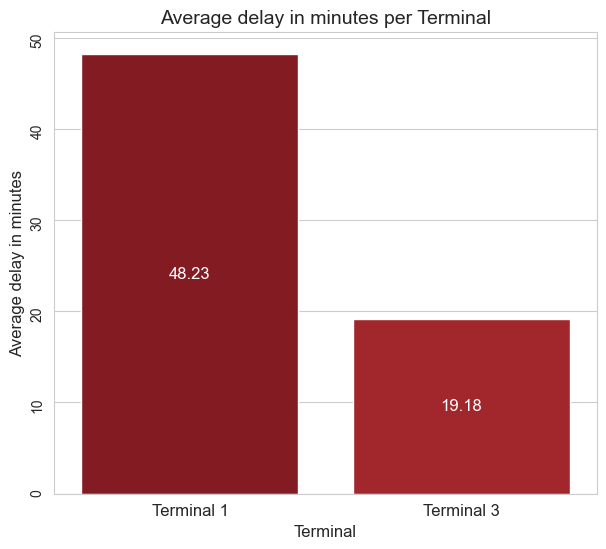

In [26]:
airport_delay = df2.groupby('CHTERM')['delay in minutes'].mean().reset_index().sort_values(by='CHTERM').round(2)
plt.figure(figsize=(7,6))
sb.set_style('whitegrid')
pcolor = sb.color_palette("Reds_r", 10)
ax = sb.barplot(data=airport_delay, x='CHTERM', y='delay in minutes', palette=pcolor)
ax.bar_label(ax.containers[0], label_type='center',color='white', fontsize=12)
x_labels = ['Terminal 1', 'Terminal 3']
ax.set_xticklabels(x_labels)
plt.title('Average delay in minutes per Terminal', fontdict={'fontsize':14})
plt.xlabel('Terminal', fontdict={'fontsize':12})
plt.ylabel('Average delay in minutes', fontdict={'fontsize':12})
plt.yticks(rotation=90)
plt.xticks(fontsize=12)
plt.show()

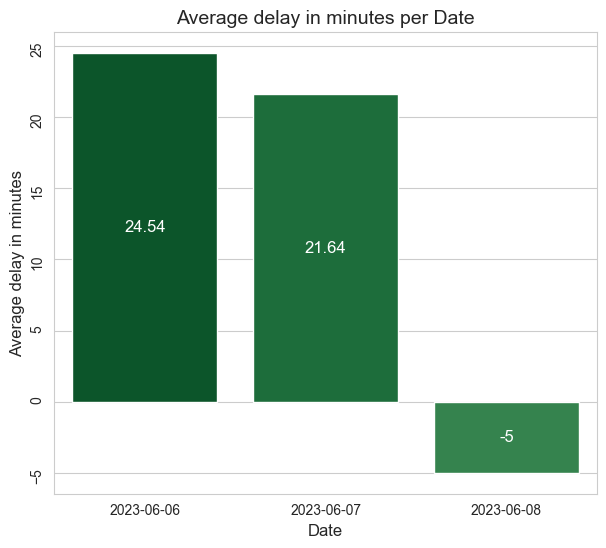

In [27]:
date_delay = df2.groupby('Date')['delay in minutes'].mean().reset_index().sort_values(by='delay in minutes', ascending=False).round(2)
plt.figure(figsize=(7,6))
sb.set_style('whitegrid')
pcolor = sb.color_palette("Greens_r", 10)
ax = sb.barplot(data=date_delay, x='Date', y='delay in minutes', palette=pcolor)
ax.bar_label(ax.containers[0], label_type='center',color='white', fontsize=12)
plt.title('Average delay in minutes per Date', fontdict={'fontsize':14})
plt.xlabel('Date', fontdict={'fontsize':12})
plt.ylabel('Average delay in minutes', fontdict={'fontsize':12})
plt.yticks(rotation=90)
plt.show()

create 3 diffrent visualizations with your analyzation

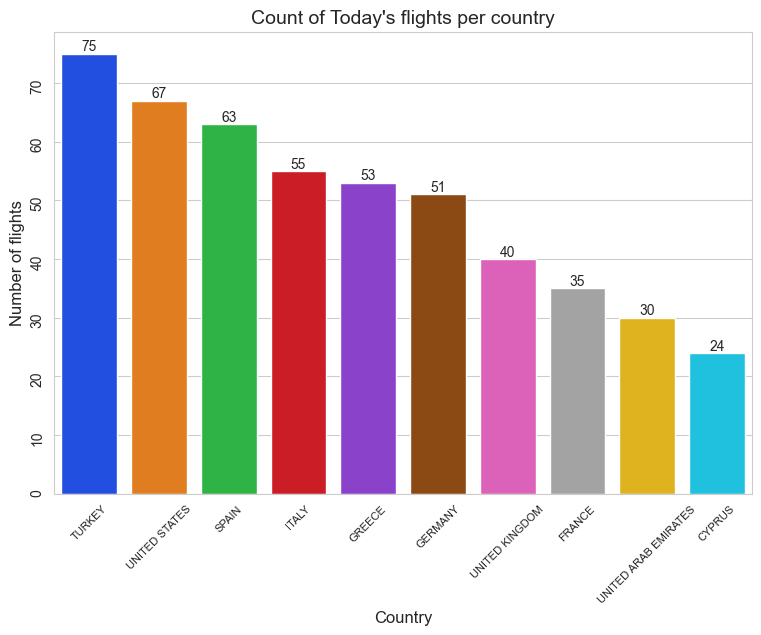

In [28]:
df['Date'] = pd.to_datetime(df["CHSTOL"]).dt.date
df_today = df[df['Date'] == pd.Timestamp.today().date()]
per_country = df_today.groupby('CHLOCCT')['CHLOC1T'].count().reset_index().sort_values(by='CHLOC1T', ascending=False).head(10)
plt.figure(figsize=(9,6))
pcolor = sb.color_palette("bright", 10)
ax = sb.barplot(data=per_country, x='CHLOCCT', y='CHLOC1T', palette=pcolor)
ax.bar_label(ax.containers[0])
plt.title('Count of Today\'s flights per country', fontdict={'fontsize':14})
plt.xlabel('Country', fontdict={'fontsize':12})
plt.ylabel('Number of flights', fontdict={'fontsize':12})
plt.yticks(rotation=90)
plt.xticks(rotation=45, fontsize=8)
plt.show()

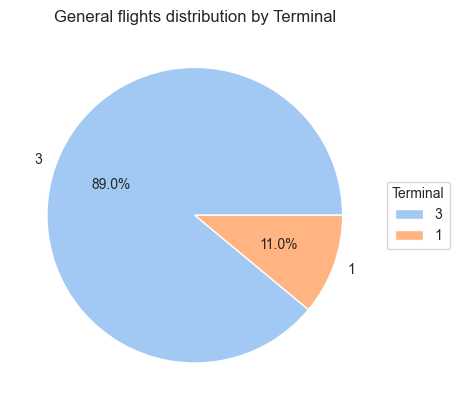

In [29]:
per_terminal = df.groupby('CHTERM')['CHLOC1T'].count().reset_index().sort_values(by='CHLOC1T', ascending=False)
per_terminal = per_terminal.set_index('CHTERM')
pcolor = sb.color_palette("pastel", 10)
per_terminal.plot.pie(y='CHLOC1T', autopct='%1.1f%%', colors=pcolor)
plt.title('General flights distribution by Terminal')
plt.legend(title='Terminal', loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('')
plt.show()

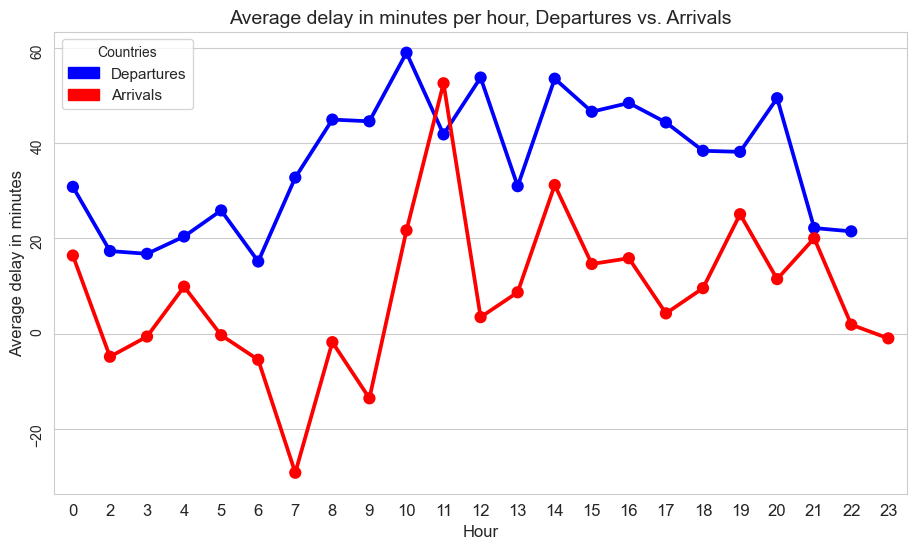

In [30]:
hourly_delay = df2.groupby(['CHAORD', 'Hour'])['delay in minutes'].mean().reset_index().sort_values(by='delay in minutes', ascending=False).round(2)
d_delay = hourly_delay[hourly_delay['CHAORD'] == 'D'].sort_values(by='Hour')
a_delay = hourly_delay[hourly_delay['CHAORD'] == 'A'].sort_values(by='Hour')
plt.figure(figsize=(11,6)) 
sb.pointplot(data=d_delay, x='Hour', y='delay in minutes', color='blue')
sb.pointplot(data=a_delay, x='Hour', y='delay in minutes', color='red')
plt.title('Average delay in minutes per hour, Departures vs. Arrivals', fontdict={'fontsize':14})
plt.xlabel('Hour', fontdict={'fontsize':12})
plt.ylabel('Average delay in minutes', fontdict={'fontsize':12})
plt.yticks(rotation=90)
plt.xticks(fontsize=12)
dep = mpatches.Patch(label = 'Departures', color='blue')
arr = mpatches.Patch(label = 'Arrivals', color='red')
plt.legend(handles = [dep,arr], title='Countries', fontsize=11, loc='upper left') 
plt.show()